<a href="https://colab.research.google.com/github/BOTnreLI/LinearRegressor_withsklearn/blob/main/674_FinalProject_regressors_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, LassoCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.svm import SVR

In [ ]:
def replacement(X):
  if(X == 7 or X == 1):
    return 1
  else: 
    return 0

def replace_2(X1, X2):
  if(X2 =='AM'):
    return X1
  elif(X2 == 'PM'):
    return X1+12
  else:
    return 0


def compute_evaluations(model, X, y_true, name):
    y_pred = model.predict(X)
    mse_value = mean_squared_error(y_true, y_pred)

    mape_value = mean_absolute_percentage_error(y_true, y_pred)

    rmse_value = mean_squared_error(y_true, y_pred, squared=False)

    print(f'Mean Squared Error for {name}: {mse_value}')
    print()
    print(f'Mean Absolute percentage error for {name}: {mape_value}')
    print()
    print(f'Root Mean Squared Error for {name}: {rmse_value}')
    print()

def build_evaluate_fn(X_train, y_train, X_test, y_test):
    def evaluate(model):
        print()
        compute_evaluations(model, X_train, y_train, 'training set')
        print('*****')
        compute_evaluations(model, X_test, y_test, 'test set')
    
    return evaluate

 
def timeSection_8(x):
    if(x == 2 or x == 3 or x == 4 or x == 5 or x == 6 or x == 7 or x == 8 or x == 9):
      return 1
    elif(x == 10 or x == 11 or x == 12 or x == 13 or x == 14 or x == 15 or x == 16 or x == 17):
      return 2
    elif(x == 18 or x == 19 or x == 20 or x == 21 or x == 22 or x == 23 or x == 24 or x == 1):
      return 3
    else: return 0

def timeSection_6(x):
    if(x == 2 or x == 3 or x == 4 or x == 5 or x == 6 or x == 7):
      return 1
    elif(x == 8 or x == 9 or x == 10 or x == 11 or x == 12 or x == 13):
      return 2
    elif(x == 14 or x == 15 or x == 16 or x == 17 or x == 18 or x == 19):
      return 3
    elif(x == 20 or x == 21 or x == 22 or x == 23 or x == 24 or x == 1):
      return 4
    else: return 0

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/674GreenComputing/ECE 674 Project/674Project_inputFinal - Sheet4.csv')
print(df.shape)
df.head()

(8921, 15)


,Date,Time,AM/PM,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition,Day-of-Week,Day-Ahead-LMP-price,1 hour before Day-Ahead-LMP-price
0,4/1/2021,12:51:00,AM,55.0,53.0,93.0,SE,5.0,0.0,29.59,0.1,Light Rain,5,17.96,17.96
1,4/1/2021,1:51:00,AM,54.0,52.0,93.0,NNW,12.0,0.0,29.55,0.0,Light Rain,5,16.05,17.96
2,4/1/2021,2:51:00,AM,49.0,45.0,86.0,NW,14.0,0.0,29.51,0.0,Light Rain,5,15.21,16.05
3,4/1/2021,3:51:00,AM,49.0,43.0,80.0,NNW,10.0,0.0,29.49,0.0,Cloudy,5,16.17,15.21
4,4/1/2021,4:51:00,AM,47.0,43.0,86.0,NNW,14.0,0.0,29.48,0.0,Light Drizzle,5,17.37,16.17


In [ ]:
df["Condition"] = df["Condition"].astype('category')
df["Condition_cat"] = df["Condition"].cat.codes

df['Day-Ahead-LMP-price'].fillna((df['Day-Ahead-LMP-price'].mean()), inplace=True)
df['1 hour before Day-Ahead-LMP-price'].fillna((df['1 hour before Day-Ahead-LMP-price'].mean()), inplace=True)
df = df.drop(columns=['Wind', 'Wind Speed', 'Wind Gust', 'Precip.'])

df = df.fillna({"Condition": "Fair"})
df = df.fillna({"Pressure": 29.816515})
df = df.fillna({"Temperature": 52.257598})
df = df.fillna({"Dew Point": 40.553549})
df = df.fillna({"Humidity": 67.807671})

print(df[df.isnull().any(axis=1)])

df['Day-of-Week'] = df['Day-of-Week'].astype('int')
df['WeekDay-WeekEnd'] = df['Day-of-Week'].apply(replacement)

df['Date'] = pd.to_datetime(df['Date'], 
 infer_datetime_format=True)

df['Date_year'] = df['Date'].dt.year
df['Date_month'] = df['Date'].dt.month
df['Date_day'] = df['Date'].dt.day

df['Time'] = pd.to_datetime(df['Time'], 
 infer_datetime_format=True,
 format='%H:%M:%S').dt.hour

df['24Hours'] = df.apply(lambda df: replace_2(df['Time'], df['AM/PM']), axis=1)

df['Time_8'] = df['24Hours'].apply(timeSection_8)
df['Time_6'] = df['24Hours'].apply(timeSection_6)


Empty DataFrame
Columns: [Date, Time, AM/PM, Temperature, Dew Point, Humidity, Pressure, Condition, Day-of-Week, Day-Ahead-LMP-price, 1 hour before Day-Ahead-LMP-price, Condition_cat]
Index: []


In [ ]:
cols = list(df.columns.values)
df = df[['Day-Ahead-LMP-price', '1 hour before Day-Ahead-LMP-price', 'Temperature', 'Dew Point', 'Humidity', 'Pressure', 'Condition_cat',
       'Date_month', 'Day-of-Week', 'WeekDay-WeekEnd','Date_day', '24Hours', 'Time_8', 'Time_6']]

cols = list(df.columns.values)
print(cols)

['Day-Ahead-LMP-price', '1 hour before Day-Ahead-LMP-price', 'Temperature', 'Dew Point', 'Humidity', 'Pressure', 'Condition_cat', 'Date_month', 'Day-of-Week', 'WeekDay-WeekEnd', 'Date_day', '24Hours', 'Time_8', 'Time_6']


In [ ]:
df

,Day-Ahead-LMP-price,1 hour before Day-Ahead-LMP-price,Temperature,Dew Point,Humidity,Pressure,Condition_cat,Date_month,Day-of-Week,WeekDay-WeekEnd,Date_day,24Hours,Time_8,Time_6
0,17.96,17.96,55.0,53.0,93.0,29.59,19,4,5,0,1,12,2,2
1,16.05,17.96,54.0,52.0,93.0,29.55,19,4,5,0,1,1,3,4
2,15.21,16.05,49.0,45.0,86.0,29.51,19,4,5,0,1,2,1,1
3,16.17,15.21,49.0,43.0,80.0,29.49,2,4,5,0,1,3,1,1
4,17.37,16.17,47.0,43.0,86.0,29.48,16,4,5,0,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,63.65,49.81,59.0,55.0,87.0,29.34,19,3,5,0,31,19,3,3
8917,49.77,63.65,59.0,57.0,93.0,29.32,19,3,5,0,31,20,3,4
8918,44.08,49.77,61.0,58.0,90.0,29.28,20,3,5,0,31,21,3,4
8919,49.80,44.08,60.0,55.0,83.0,29.32,19,3,5,0,31,22,3,4


In [ ]:
corr = df[df.columns[:]].corr()['Day-Ahead-LMP-price'][:]
print(corr)

Day-Ahead-LMP-price                  1.000000
1 hour before Day-Ahead-LMP-price    0.967137
Temperature                         -0.553965
Dew Point                           -0.528326
Humidity                            -0.105511
Pressure                             0.211146
Condition_cat                        0.004025
Date_month                          -0.326601
Day-of-Week                         -0.008253
WeekDay-WeekEnd                     -0.043496
Date_day                             0.075330
24Hours                              0.061094
Time_8                               0.029844
Time_6                               0.031612
Name: Day-Ahead-LMP-price, dtype: float64


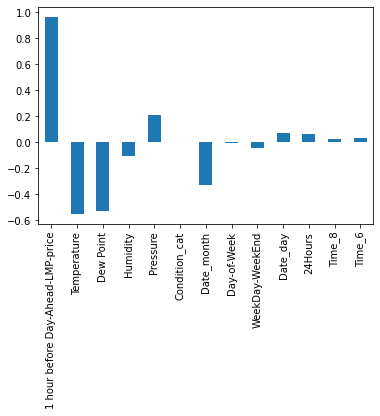

In [ ]:
corr.iloc[1:].plot(kind='bar')

In [ ]:
cols = list(df.columns.values)
df = df[['Day-Ahead-LMP-price', '1 hour before Day-Ahead-LMP-price', 'Pressure', 'Date_day', '24Hours', 'Time_6', 'Time_8', 'Day-of-Week', 'Condition_cat', 'WeekDay-WeekEnd', 'Humidity', 'Date_month', 'Dew Point', 
       'Temperature']]

cols = list(df.columns.values)
print(cols)

['Day-Ahead-LMP-price', '1 hour before Day-Ahead-LMP-price', 'Pressure', 'Date_day', '24Hours', 'Time_6', 'Time_8', 'Day-of-Week', 'Condition_cat', 'WeekDay-WeekEnd', 'Humidity', 'Date_month', 'Dew Point', 'Temperature']


Day-Ahead-LMP-price                  1.000000
1 hour before Day-Ahead-LMP-price    0.967137
Pressure                             0.211146
Date_day                             0.075330
24Hours                              0.061094
Time_6                               0.031612
Time_8                               0.029844
Day-of-Week                         -0.008253
Condition_cat                        0.004025
WeekDay-WeekEnd                     -0.043496
Humidity                            -0.105511
Date_month                          -0.326601
Dew Point                           -0.528326
Temperature                         -0.553965
Name: Day-Ahead-LMP-price, dtype: float64


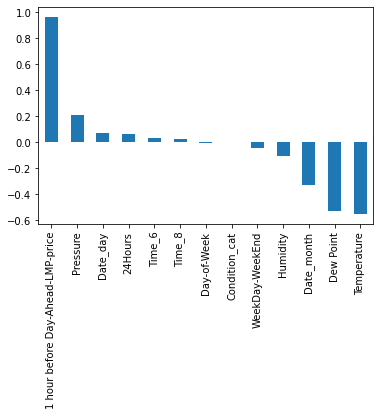

In [ ]:
corr = df[df.columns[:]].corr()['Day-Ahead-LMP-price'][:]
print(corr)
corr.iloc[1:].plot(kind='bar')

# Start training our regressors here.

In [ ]:

X = df.drop(columns='Day-Ahead-LMP-price')
Y = df['Day-Ahead-LMP-price']

print(X)

before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


model = LinearRegression()
model.fit(X_train, y_train)
prediction_LinearRegression = model.predict(X_test)

regressorSVR = SVR(kernel='poly', degree=5)
regressorSVR.fit(X_train, y_train)
prediction_SVR = regressorSVR.predict(X_test)

alphavec = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train, y_train)

prediction_lasso = lasso_model.predict(X_test)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)



      1 hour before Day-Ahead-LMP-price  Pressure  Date_day  24Hours  Time_6  \
0                                 17.96     29.59         1       12       2   
1                                 17.96     29.55         1        1       4   
2                                 16.05     29.51         1        2       1   
3                                 15.21     29.49         1        3       1   
4                                 16.17     29.48         1        4       1   
...                                 ...       ...       ...      ...     ...   
8916                              49.81     29.34        31       19       3   
8917                              63.65     29.32        31       20       4   
8918                              49.77     29.28        31       21       4   
8919                              44.08     29.32        31       22       4   
8920                              49.80     29.32        31       23       4   

      Time_8  Day-of-Week  Condition_ca

In [ ]:
evaluate = build_evaluate_fn(X_train, y_train, X_test, y_test)
print('Error for linear regressor')
evaluate(model)
print('------------------------------')
print('Error for SVR')
evaluate(regressorSVR)

print('Error for lasso_model')
evaluate(lasso_model)
print('------------------------------')
print('Error for RidgeCV')
evaluate(RidgeCV_model)

Error for linear regressor

Mean Squared Error for training set: 22.5336695313192

Mean Absolute percentage error for training set: 0.08251168773804526

Root Mean Squared Error for training set: 4.74696424373717

*****
Mean Squared Error for test set: 71.50956546083617

Mean Absolute percentage error for test set: 0.08913391946077016

Root Mean Squared Error for test set: 8.456332861284269

------------------------------
Error for SVR

Mean Squared Error for training set: 20.638078056055594

Mean Absolute percentage error for training set: 0.07698478745675642

Root Mean Squared Error for training set: 4.542915149554919

*****
Mean Squared Error for test set: 385.87082619389747

Mean Absolute percentage error for test set: 0.16410752145098273

Root Mean Squared Error for test set: 19.64359504250425

Error for lasso_model

Mean Squared Error for training set: 22.84764069514691

Mean Absolute percentage error for training set: 0.08147682301820128

Root Mean Squared Error for training set:

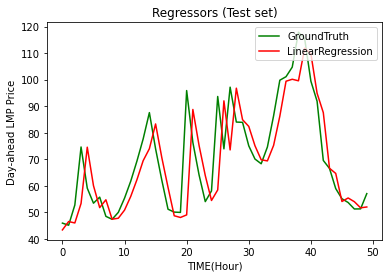

In [ ]:
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:50], color = "green", label='GroundTruth')
#plt.plot(prediction_RidgeCV[:50], color ='black', label='RidgeCV')
#plt.plot(prediction_lasso[:50], color ='yellow', label='lasso')
plt.plot(prediction_LinearRegression[:50], color ='red', label='LinearRegression')
#plt.plot(prediction_SVR[:50], color ='blue', label='SVR(poly, degree=5)')


plt.title("Regressors (Test set)")
plt.xlabel("TIME(Hour)")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper right')
plt.show()

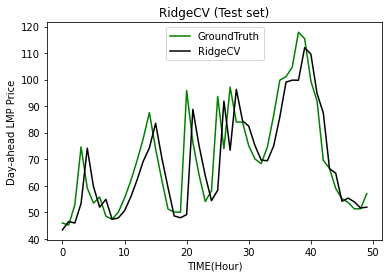

In [ ]:
plt.plot(groundTruth[:50], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:50], color ='black', label='RidgeCV')

plt.title("RidgeCV (Test set)")
plt.xlabel("TIME(Hour)")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

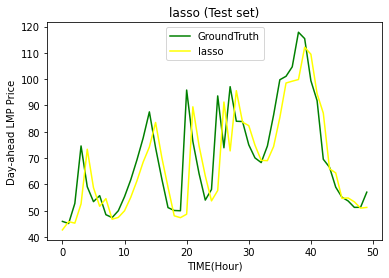

In [ ]:
plt.plot(groundTruth[:50], color = "green", label='GroundTruth')
plt.plot(prediction_lasso[:50], color ='yellow', label='lasso')

plt.title("lasso (Test set)")
plt.xlabel("TIME(Hour)")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

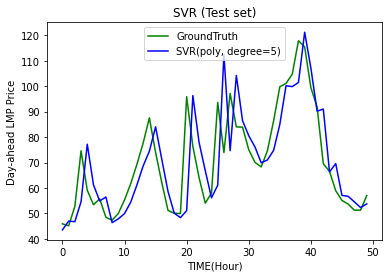

In [ ]:
plt.plot(groundTruth[:50], color = "green", label='GroundTruth')
plt.plot(prediction_SVR[:50], color ='blue', label='SVR(poly, degree=5)')

plt.title("SVR (Test set)")
plt.xlabel("TIME(Hour)")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

In [ ]:
MSE, RMSE, MAPE = [], [], []

6690
(4683, 1)
(2007, 1)
(4683,)
(2007,)
mean_squared_error: 2124.1497433480354
mean_absolute_percentage_error: 0.5629125056211097
mean_squared_error: 46.08849903552984


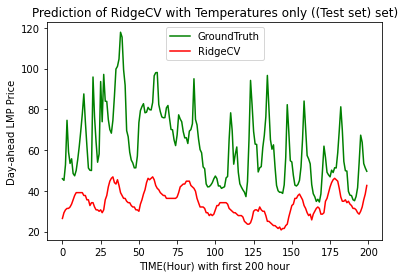

In [ ]:
#Temperature only model 
#'Day-Ahead-LMP-price', '1 hour before Day-Ahead-LMP-price', 'Pressure', 'Date_day', '24Hours', 'Time_6', 'Time_8', 'Day-of-Week', 'Condition_cat', 'WeekDay-WeekEnd', 'Humidity', 'Date_month', 'Dew Point', 
#'Temperature'
X = df[['Temperature']]

before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mse}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 2)
(2007, 2)
(4683,)
(2007,)
mean_squared_error: 2210.9396997247436
mean_absolute_percentage_error: 0.5789610400800334
mean_squared_error: 47.02063057557548


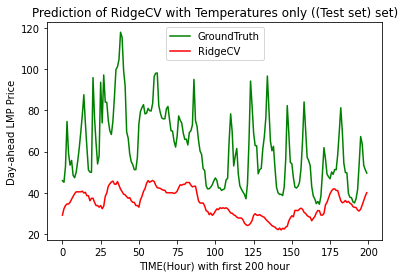

In [ ]:
#Temperature only model 
#'Day-Ahead-LMP-price', '1 hour before Day-Ahead-LMP-price', 'Pressure', 'Date_day', '24Hours', 'Time_6', 'Time_8', 'Day-of-Week', 'Condition_cat', 'WeekDay-WeekEnd', 'Humidity', 'Date_month', 'Dew Point', 
#'Temperature'
X = df[['Temperature', 'Dew Point']]

before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mse}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 3)
(2007, 3)
(4683,)
(2007,)
mean_squared_error: 923.4283468974181
mean_absolute_percentage_error: 0.3116567916946924
mean_squared_error: 30.38796384915281


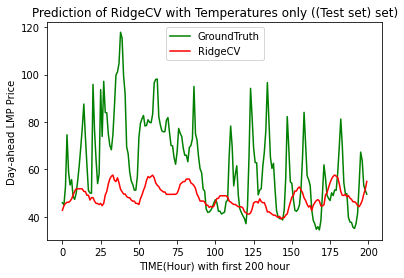

In [ ]:
#Temperature only model 
#'Day-Ahead-LMP-price', '1 hour before Day-Ahead-LMP-price', 'Pressure', 'Date_day', '24Hours', 'Time_6', 'Time_8', 'Day-of-Week', 'Condition_cat', 'WeekDay-WeekEnd', 'Humidity', 'Date_month', 'Dew Point', 
#'Temperature'
X = df[['Temperature', 'Dew Point', 'Date_month']]

before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mse}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 4)
(2007, 4)
(4683,)
(2007,)
mean_squared_error: 885.7432778098109
mean_absolute_percentage_error: 0.3131335929243613
mean_squared_error: 29.761439444519663


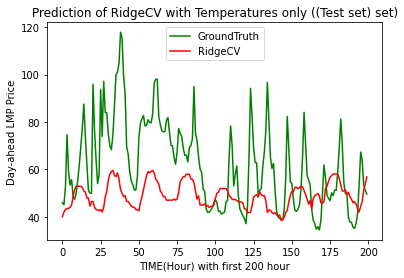

In [ ]:
#Temperature only model 
#'Day-Ahead-LMP-price', '1 hour before Day-Ahead-LMP-price', 'Pressure', 'Date_day', '24Hours', 'Time_6', 'Time_8', 'Day-of-Week', 'Condition_cat', 'WeekDay-WeekEnd', 'Humidity', 'Date_month', 'Dew Point', 
#'Temperature'
X = df[['Temperature', 'Dew Point', 'Date_month', 'Humidity']]

before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mse}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 5)
(2007, 5)
(4683,)
(2007,)
mean_squared_error: 881.6138800350392
mean_absolute_percentage_error: 0.3187647702851911
mean_squared_error: 29.691983430465523


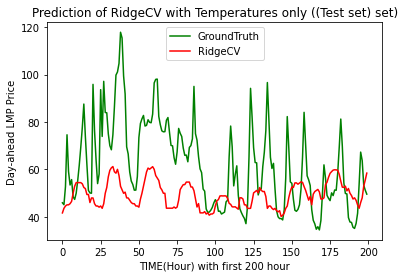

In [ ]:
#Temperature only model 
#'Day-Ahead-LMP-price', '1 hour before Day-Ahead-LMP-price', 'Pressure', 'Date_day', '24Hours', 'Time_6', 'Time_8', 'Day-of-Week', 'Condition_cat', 'WeekDay-WeekEnd', 'Humidity', 'Date_month', 'Dew Point', 
#'Temperature'
X = df[['Temperature', 'Dew Point', 'Date_month', 'Humidity', 'WeekDay-WeekEnd']]

before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mse}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 6)
(2007, 6)
(4683,)
(2007,)
mean_squared_error: 868.9465179332209
mean_absolute_percentage_error: 0.31768550881851365
mean_squared_error: 29.477898804582747


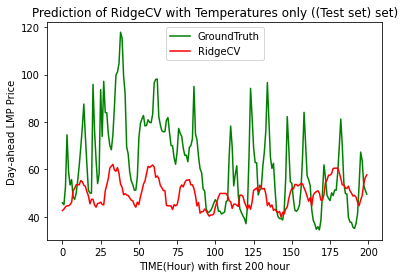

In [ ]:
#Temperature only model 
#'Day-Ahead-LMP-price', '1 hour before Day-Ahead-LMP-price', 'Pressure', 'Date_day', '24Hours', 'Time_6', 'Time_8', 'Day-of-Week', 'Condition_cat', 'WeekDay-WeekEnd', 'Humidity', 'Date_month', 'Dew Point', 
#'Temperature'
X = df[['Temperature', 'Dew Point', 'Date_month', 'Humidity', 'WeekDay-WeekEnd', 'Condition_cat']]

before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mse}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 7)
(2007, 7)
(4683,)
(2007,)
mean_squared_error: 873.3854800165556
mean_absolute_percentage_error: 0.31742594652473516
mean_squared_error: 29.553095946390382


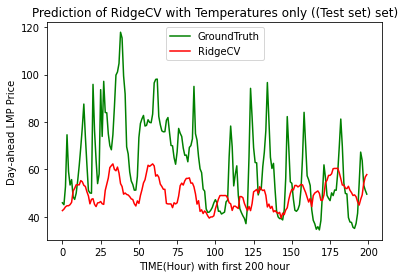

In [ ]:
#Temperature only model 
#'Day-Ahead-LMP-price', '1 hour before Day-Ahead-LMP-price', 'Pressure', 'Date_day', '24Hours', 'Time_6', 'Time_8', 'Day-of-Week', 'Condition_cat', 'WeekDay-WeekEnd', 'Humidity', 'Date_month', 'Dew Point', 
#'Temperature'
X = df[['Temperature', 'Dew Point', 'Date_month', 'Humidity', 'WeekDay-WeekEnd', 'Condition_cat', 'Day-of-Week']]

before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mse}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 8)
(2007, 8)
(4683,)
(2007,)
mean_squared_error: 856.3251063548447
mean_absolute_percentage_error: 0.31590708395810274
mean_squared_error: 29.263033102445903


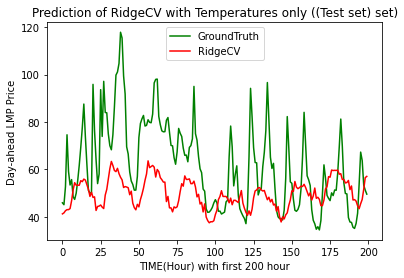

In [ ]:
#Temperature only model 
#'Day-Ahead-LMP-price', '1 hour before Day-Ahead-LMP-price', 'Pressure', 'Date_day', '24Hours', 'Time_6', 'Time_8', 'Day-of-Week', 'Condition_cat', 'WeekDay-WeekEnd', 'Humidity', 'Date_month', 'Dew Point', 
#'Temperature'
X = df[['Temperature', 'Dew Point', 'Date_month', 'Humidity', 'WeekDay-WeekEnd', 'Condition_cat', 'Day-of-Week', 'Time_8']]

before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mse}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 9)
(2007, 9)
(4683,)
(2007,)
mean_squared_error: 854.066215555734
mean_absolute_percentage_error: 0.31546308564723186
mean_squared_error: 29.224411295280763


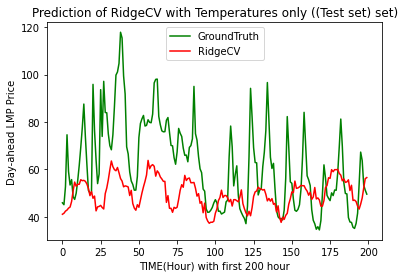

In [ ]:
#Temperature only model 
#'Day-Ahead-LMP-price', '1 hour before Day-Ahead-LMP-price', 'Pressure', 'Date_day', '24Hours', 'Time_6', 'Time_8', 'Day-of-Week', 'Condition_cat', 'WeekDay-WeekEnd', 'Humidity', 'Date_month', 'Dew Point', 
#'Temperature'
X = df[['Temperature', 'Dew Point', 'Date_month', 'Humidity', 'WeekDay-WeekEnd', 'Condition_cat', 'Day-of-Week', 'Time_8', 'Time_6']]

before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mse}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 10)
(2007, 10)
(4683,)
(2007,)
mean_squared_error: 830.2183082679807
mean_absolute_percentage_error: 0.31146572374360615
mean_squared_error: 28.813509127976424


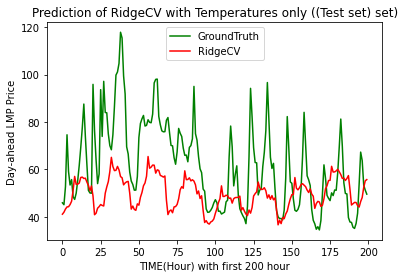

In [ ]:
#Temperature only model 
#'Day-Ahead-LMP-price', '1 hour before Day-Ahead-LMP-price', 'Pressure', 'Date_day', '24Hours', 'Time_6', 'Time_8', 'Day-of-Week', 'Condition_cat', 'WeekDay-WeekEnd', 'Humidity', 'Date_month', 'Dew Point', 
#'Temperature'
X = df[['Temperature', 'Dew Point', 'Date_month', 'Humidity', 'WeekDay-WeekEnd', 'Condition_cat', 'Day-of-Week', 'Time_8', 'Time_6', '24Hours']]

before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mse}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 11)
(2007, 11)
(4683,)
(2007,)
mean_squared_error: 771.1980853753973
mean_absolute_percentage_error: 0.31242847829583664
mean_squared_error: 27.77045346002469


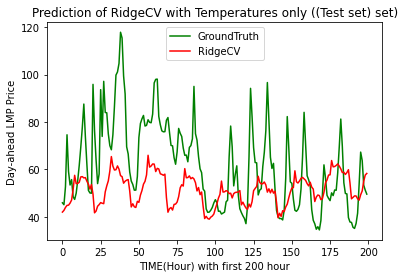

In [ ]:
#Temperature only model 
#'Day-Ahead-LMP-price', '1 hour before Day-Ahead-LMP-price', 'Pressure', 'Date_day', '24Hours', 'Time_6', 'Time_8', 'Day-of-Week', 'Condition_cat', 'WeekDay-WeekEnd', 'Humidity', 'Date_month', 'Dew Point', 
#'Temperature'
X = df[['Temperature', 'Dew Point', 'Date_month', 'Humidity', 'WeekDay-WeekEnd', 'Condition_cat', 'Day-of-Week', 'Time_8', 'Time_6', '24Hours', 'Date_day']]

before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mse}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 12)
(2007, 12)
(4683,)
(2007,)
mean_squared_error: 762.5957342207608
mean_absolute_percentage_error: 0.31350485566441616
mean_squared_error: 27.615135962380503


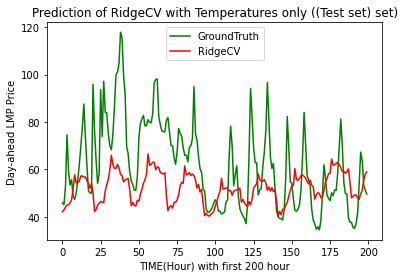

In [ ]:
#Temperature only model 
#'Day-Ahead-LMP-price', '1 hour before Day-Ahead-LMP-price', 'Pressure', 'Date_day', '24Hours', 'Time_6', 'Time_8', 'Day-of-Week', 'Condition_cat', 'WeekDay-WeekEnd', 'Humidity', 'Date_month', 'Dew Point', 
#'Temperature'
X = df[['Temperature', 'Dew Point', 'Date_month', 'Humidity', 'WeekDay-WeekEnd', 'Condition_cat', 'Day-of-Week', 'Time_8', 'Time_6', '24Hours', 'Date_day', 'Pressure']]

before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mse}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 13)
(2007, 13)
(4683,)
(2007,)
mean_squared_error: 72.10466567317488
mean_absolute_percentage_error: 0.08902563559431091
mean_squared_error: 8.491446618402243


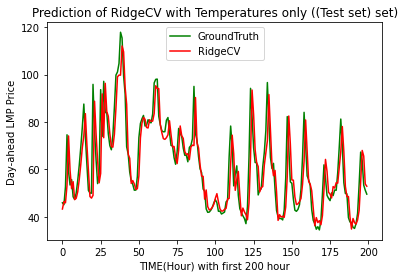

In [ ]:
#Temperature only model 
#'Day-Ahead-LMP-price', '1 hour before Day-Ahead-LMP-price', 'Pressure', 'Date_day', '24Hours', 'Time_6', 'Time_8', 'Day-of-Week', 'Condition_cat', 'WeekDay-WeekEnd', 'Humidity', 'Date_month', 'Dew Point', 
#'Temperature'
X = df[['Temperature', 'Dew Point', 'Date_month', 'Humidity', 'WeekDay-WeekEnd', 'Condition_cat', 'Day-of-Week', 'Time_8', 'Time_6', '24Hours', 'Date_day', 'Pressure', '1 hour before Day-Ahead-LMP-price']]

before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mse}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

In [ ]:
print(len(MSE))
print(len(RMSE))
print(len(MAPE))

13
13
13


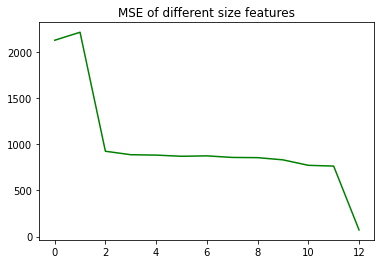

In [ ]:
plt.title("MSE of different size features")
plt.plot(MSE, color = "green")

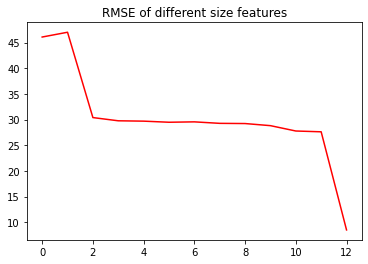

In [ ]:
plt.title("RMSE of different size features")
plt.plot(RMSE, color = "red")

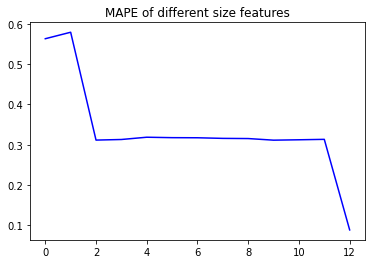

In [ ]:
plt.title("MAPE of different size features")
plt.plot(MAPE, color = "blue")